
**Mini Project: Predictive Maintenance using Machine Learning**
**Project Description**

In this mini project, you will develop a predictive maintenance system using machine
learning techniques. 

The goal is to predict machine failures based on sensor data from
industrial equipment. 

You will work with a dataset containing various sensor measurements
and use two different machine learning models of your choice.

**------------------Solution------------------**

**Step 1:** Loading dependencies:

The first step is to load in the necessary dependencies, as i will be using these packages to load the training data, and train the models.

In [8]:
import numpy as np
import pandas as pd
import matplotlib as mp
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from keras._tf_keras.keras.models import Sequential
from keras._tf_keras.keras.layers import Dense, Dropout

**Step 2:** Loading the dataset with `pandas`

I will only load relevant data, since i am only interested in the datapoints for Air temperature, Process temperature, Rotational speed, Torque, Tool wear and Machine failure.

In [9]:
data = pd.read_csv("ai4i2020.csv", usecols=['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', "Machine failure"])
data

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.1,308.5,1498,49.4,5,0
3,298.2,308.6,1433,39.5,7,0
4,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0
9996,298.9,308.4,1632,31.8,17,0
9997,299.0,308.6,1645,33.4,22,0
9998,299.0,308.7,1408,48.5,25,0


**Step 3:** Choice of models

The miniproject dictates, that i should choose two different models to try and predict machine failures based on the collected data. 

Choosing which models necessitates some considerations, as to which models would be best fit to perform this task. Here i will list a number of models that have been introduced throughout the course.

- Random Forests                    (Lecture 5)
- Logisitc Regression               (Lecture 6)
- Artificial Neural Networks (ANNs) (Lecture 9)

### **Dataset Format Considerations**

The provided dataset consists of 10,000 rows and the following columns:
- **Features**: Air temperature [K], Process temperature [K], Rotational speed [rpm], Torque [Nm], Tool wear [min].
- **Target Variable**: Machine failure (binary classification: 0 or 1).

**Characteristics of the Dataset:**
   - All features are numerical and continuous, making the dataset suitable for a wide range of ML models without requiring extensive preprocessing.
   - The target variable ("Machine failure") makes the problem a binary classification task, which is ideal for models like Logistic Regression, Random Forests, or Neural Networks.
   - Features like temperatures and rotational speed have ranges that do not vary drastically. However, scaling methods (e.g., standardization) might be necessary for using models that are sensitive to feature scaling (e.g., SVM, Neural Networks).
   - The dataset might exhibit non-linear relationships or interactions between features, favoring models that can capture such complexities (e.g., Random Forests, ANNs).
   - With 10,000 rows, the dataset is large enough to benefit from complex models like Random Forests and ANNs while remaining manageable in terms of computationality.
   - The data is an imbalanced dataset. This means that there are significantly more target variables measured as 0 instead of 1, meaning that if the model i choose always classifies 0, it might get 95% accuracy, assuming that 500 data points are 1 and 9500 data points are 0.

### **Model Type Considerations**
**Random Forests**
- **Strengths**: Robust ensemble model, handles non-linear relationships, provides feature importance, resists overfitting, class weights for more importance in minority class.
- **Weaknesses**: Computationally intensive for large datasets.
- **Reasoning**: Ideal for structured data and reliable classification.

**Logistic Regression**
- **Strengths**: Simple, interpretable, efficient for binary classification.
- **Weaknesses**: Assumes linear relationships, struggles with complex patterns.
- **Reasoning**: Provides a baseline for comparison with more complex models.

**Artificial Neural Networks (ANNs)**
- **Strengths**: Models complex relationships, scalable to large datasets.
- **Weaknesses**: Computationally expensive, less interpretable.
- **Reasoning**: Strong candidate for capturing non-linear relationships.

**Selected Models:**
1. **Random Forests**: Chosen for robustness and interpretability.
2. **Artificial Neural Networks**: Selected for handling complex patterns effectively.

Now that i have chosen the models i want to use, i have to train them on the data that has been provided. In order to do this, it is wise to first break up the data into training data and testing/validation data.

In [10]:
X = data[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
y = data['Machine failure']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

**Step 4:** Instantiate Models and Train on Data

Now the dataset has been separated into X, which contains all of the features, and the target variable in y.
I can now split the dataset into 80% training data and 20% testing data, and use this for training the models.

Before i can do that, i need to instantiate the models.
For the Random Forest Classifier, i would like to perform some hyperparameter tuning so i can find a set of hyperparameters that will yield the most accurate model. For this i use Grid Search.
Grid Search needs a hyperparameter grid to test, so i have found some typical ranges for each of the hyperparameters online and defined them in param_grid.

I ensure reproducibility by providing a random state, and the class weight handles the imbalanced datasheet, such that the weights are inversely proportional to class frequency.

For the Grid Search, i have chosen to set it to 3 folds and scoring using f1-score.


In [11]:
# Hyperparameter Tuning Random Forest Classifier - NOTE: Time Consuming, uncomment to test
#RFModel = RandomForestClassifier(random_state=42, class_weight="balanced")

#param_grid = {
#    'n_estimators': [100, 200, 300],
#    'max_depth': [None, 10, 20, 30],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4],
#}
#
## Perform grid search
#grid_search = GridSearchCV(estimator=RFModel, param_grid=param_grid, cv=3, scoring='f1', verbose=2, n_jobs=-1)
#grid_search.fit(X_train, y_train)
#
## Best parameters and score
#print("Best Parameters:", grid_search.best_params_)
#print("Best Score:", grid_search.best_score_)

#---------------------------------------------------------------------------------------------------------------
#Hyperparameter Tuning for ANN

#scaler = StandardScaler()
#ann


**Step 5:** Testing and Validation

For the Random Forest Classifier, Grid Search provides the following output:

324 total fits tested:
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}

Best Score: 0.708111173799546

In [12]:
RFModel = RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200)
RFModel.fit(X_train,y_train)

y_pred = RFModel.predict(X_test)

print("Accuracy: ", accuracy_score(y_test,y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy:  0.9825
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1939
           1       0.78      0.59      0.67        61

    accuracy                           0.98      2000
   macro avg       0.88      0.79      0.83      2000
weighted avg       0.98      0.98      0.98      2000



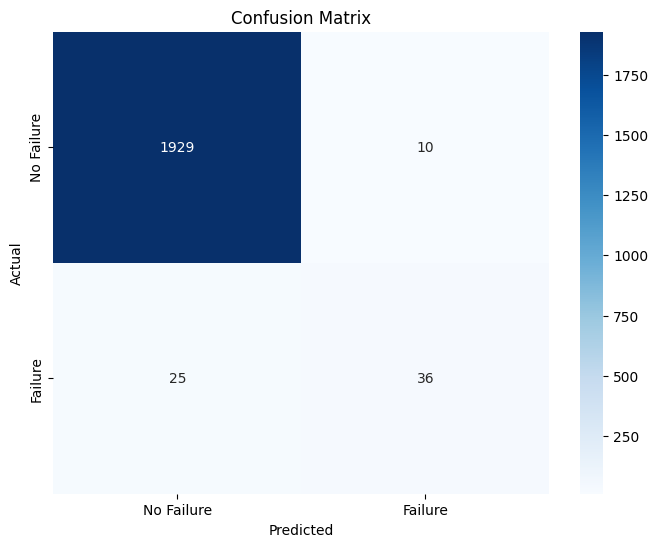

In [15]:
y_pred_classes = (y_pred > 0.5).astype("int32")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred_classes are defined
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()